[]
主成分の分散説明率
[0.53459577]
55 55
Train score: 0.237
Test score: 0.059
トレーニングデータに対する正解率： 0.24
(38, 1)


<Figure size 1440x720 with 0 Axes>

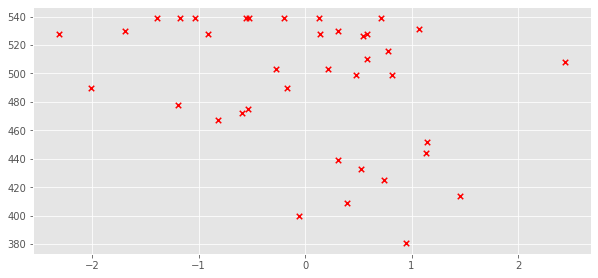

In [276]:
import numpy as np
import pandas as pd
#from sklearn.decomposition import PCA
from pandas import plotting
from sklearn import preprocessing, decomposition
from sklearn.svm import LinearSVC, SVC
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import scipy.stats
import mglearn


df_sunlight = pd.read_csv('sunlight_hours.csv', index_col=0)
df_temp = pd.read_csv('NiigataKishou_temp.csv', index_col = 0)
df_humidity = pd.read_csv('arrange_humidity.csv', index_col = 0)
df_yield = pd.read_csv('niigata_rice_10a.csv', index_col = 0)
#print(df_sunlight['1'])
#df_sunlight.plot()
#df_temp.plot()
#df_humidity.plot()
#df_yield.plot()

#plotting.scatter_matrix(df_sunlight)

sunlight = df_sunlight['6'].values
#print(sunlight)
temp = df_temp['6'].values
humidity = df_humidity['6'].values


#data = np.empty((55,3), float)
data = np.empty([0, 3])
print(data)
for i in range(len(sunlight)):
    temp_array = np.array([sunlight[i], temp[i], humidity[i]])
    #print(temp_array, type(temp_array))
    #data = np.concatenate([data, temp_array], axis = 0)
    data = np.append(data, np.array([temp_array]), axis = 0)
    #print(np.array([sunlight[i], temp[i], humidity[i]]))


#data = [sunlight, temp, humidity]
#data = np.array(data)
#print(data)


rice_yield = np.array(df_yield['Yield/10a(t)'].values)
#print(rice_yield)

#pca = PCA()

pca = decomposition.PCA(n_components=1)
#pca.fit(data)
sc=StandardScaler()
#sc.fit(data)
X=sc.fit_transform(data)
#X = pca.fit_transform(data)


#pca.fit(rice_yield)
#sc.fit(rice_yield)
#R = sc.transform(rice_yield)


#pca = decomposition.PCA(n_components=1)
X_transformed = pca.fit_transform(X)
#R_transformed = pca.fit_transform(R)
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)
#print("固有ベクトル")
#print(pca.components_)
#print(pca.singular_values_)



#print(X_transformed)
#rice_yield = scipy.stats.zscore(rice_yield)
print(rice_yield.size, X_transformed.size)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, rice_yield.T, test_size=0.3, random_state=None )


#print(y_train)


sc = StandardScaler() 
sc.fit(X_train)
#print(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#y_train_std = sc.transform(y_train)



''' SVM '''

model = SVC(kernel='linear', random_state=None)
model.fit(X_train_std, y_train)
#model.fit(y_train, X_train_std) 本当はこっちが良いのでは?
predict = model.predict(X_test_std)


#print(X_train_std)
#print(y_train)
#print(X_train.size == y_train.size)
#mglearn.plots.plot_2d_separator(X_train_std, y_train)

print('Train score: {:.3f}'.format(model.score(X_train, y_train)))
print('Test score: {:.3f}'.format(model.score(X_test, y_test)))



from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度

pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(20,10))
#plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
#plt.show()




import matplotlib.pyplot as plt

print(X_train.shape)
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.scatter(X_train_std, y_train, c='red', marker='x', s=30, label='origin')
#plt.scatter(X, c='blue', marker='x', s=30, label='standard ')



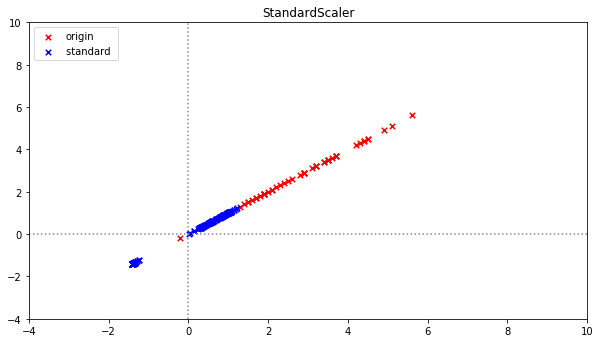

In [170]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 12))
plt.subplot(2,1,1)
plt.title('StandardScaler')
plt.xlim([-4, 10])
plt.ylim([-4, 10])
plt.scatter(data, data, c='red', marker='x', s=30, label='origin')
plt.scatter(X, X, c='blue', marker='x', s=30, label='standard ')
plt.legend(loc='upper left')
plt.hlines(0,xmin=-4, xmax=10, colors='#888888', linestyles='dotted')
plt.vlines(0,ymin=-4, ymax=10, colors='#888888', linestyles='dotted')